<h2 style="color : #004080;"><span style="text-decoration : underline">Exercice 1 :</span>Analyse des données de fabrication de ciment</h2>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set_theme(style="darkgrid")

<h2> 1. Prétraitement des données </h2>

In [2]:
df = pd.read_excel('./data/exercice_1/data_Ciment.xlsx', sheet_name=0)
df.isnull().sum()

A     71
B      2
C      2
D      7
E     13
F      2
G      2
H      2
I      2
J     30
K      2
L      2
M      1
N      2
O      2
P      2
Q      2
R     74
S      2
T      2
U      2
V     74
W      2
X     74
Y      2
Z      2
AA     2
AB     2
AV     2
AD     2
AE     2
AF     2
AG     2
AH     2
AI     2
AJ     2
AK     2
AL     2
AM     2
AN     2
AO     2
AP     2
AQ     2
AR     2
dtype: int64

### Renommer les colonnes

In [3]:
df1 = pd.read_excel('./data/exercice_1/data_Ciment.xlsx', sheet_name=1, usecols=[0, 1], nrows=44, header=None)
columns = {}
for col in df1.to_dict(orient='records'):
    columns[col[0]] = col[1]
# df.rename(columns=columns, inplace=True)
# df.head()
columns

{'A': 'date',
 'B': 'hour',
 'C': 'feeding scale',
 'D': 'Free calcium',
 'E': 'Eligibility test',
 'F': 'kiln speed',
 'G': 'kiln head scale',
 'H': 'kiln tailor scale',
 'I': 'Body temperature',
 'J': 'the top tempreture of the primary pre-heator ',
 'K': 'the top pressure of the primary pre-heator ',
 'L': 'the bottom tempreture of the primary pre-heator ',
 'M': 'the bottom pressure of the primary pre-heator ',
 'N': 'the top tempreture of the secondary pre-heator ',
 'O': 'the top pressure of the secondary pre-heator ',
 'P': 'the bottom tempreture of the secondary pre-heator ',
 'Q': 'the bottom pressure of the secondary pre-heator ',
 'R': 'the top tempreture of the tertiary pre-heator ',
 'S': 'the top pressure of the tertiary pre-heator ',
 'T': 'the bottom tempreture of the tertiary pre-heator ',
 'U': 'the bottom pressure of the tertiary pre-heator ',
 'V': 'the top tempreture of the four pre-heator ',
 'W': 'the top pressure of the four pre-heator ',
 'X': 'the bottom tempr

### Identification des colonnes nulles

<Axes: >

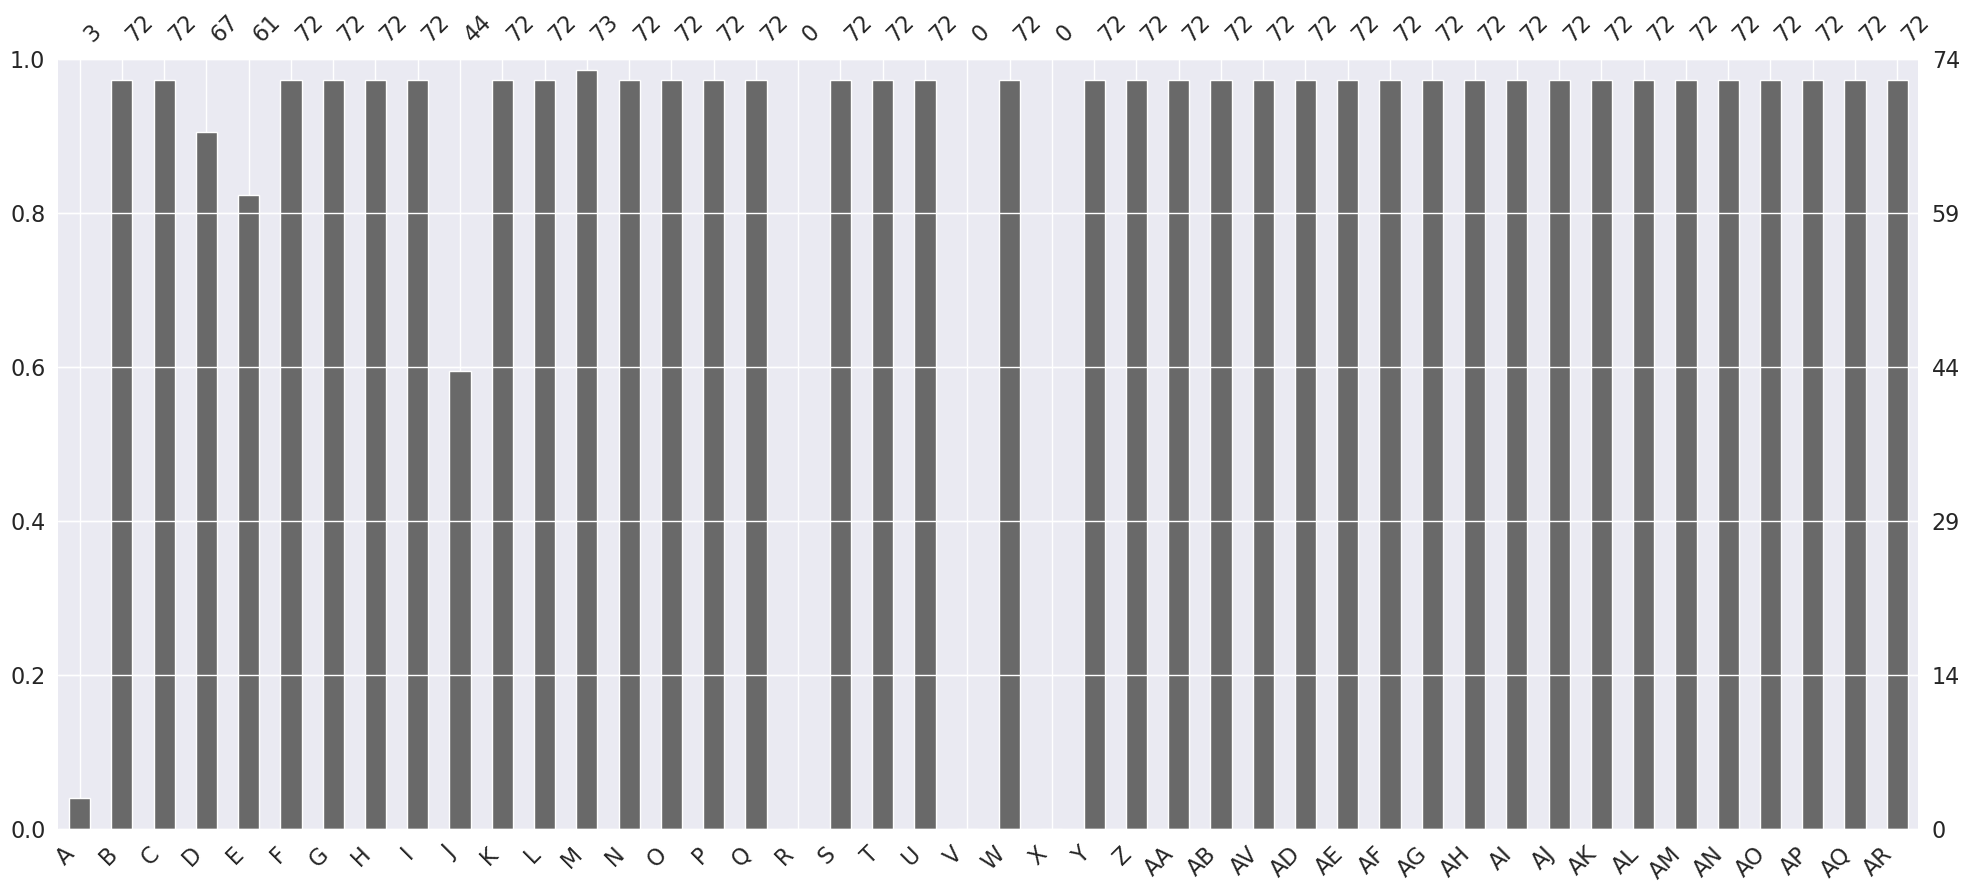

In [87]:
msno.bar(df)

### Identification et suppression des colonnes constantes et null

In [4]:
for col in df.columns:
    nb_value = df[col].nunique()
    if nb_value <= 1:
        df.drop(axis=0, columns=[col], inplace=True)
        print(f"Colonne \"{col}\" supprimée")

Colonne "R" supprimée
Colonne "V" supprimée
Colonne "X" supprimée
Colonne "AH" supprimée
Colonne "AI" supprimée
Colonne "AQ" supprimée


In [5]:
# Pourcentage de donnees manquantes
col_missing_pct = (df.isna().sum()/df.shape[0])*100
col_missing_pct.sort_values(ascending=False)

A     95.945946
J     40.540541
E     17.567568
D      9.459459
C      2.702703
B      2.702703
F      2.702703
G      2.702703
H      2.702703
I      2.702703
K      2.702703
L      2.702703
N      2.702703
O      2.702703
T      2.702703
P      2.702703
Q      2.702703
S      2.702703
W      2.702703
U      2.702703
Y      2.702703
Z      2.702703
AJ     2.702703
AA     2.702703
AB     2.702703
AV     2.702703
AD     2.702703
AE     2.702703
AF     2.702703
AG     2.702703
AN     2.702703
AK     2.702703
AL     2.702703
AM     2.702703
AP     2.702703
AO     2.702703
AR     2.702703
M      1.351351
dtype: float64

### Identification et suppression des colonnes inutile

In [6]:
# Suppression de la colonne Date
df.drop(df.columns[0], axis=1, inplace=True)

In [7]:
df.isna().sum()

B      2
C      2
D      7
E     13
F      2
G      2
H      2
I      2
J     30
K      2
L      2
M      1
N      2
O      2
P      2
Q      2
S      2
T      2
U      2
W      2
Y      2
Z      2
AA     2
AB     2
AV     2
AD     2
AE     2
AF     2
AG     2
AJ     2
AK     2
AL     2
AM     2
AN     2
AO     2
AP     2
AR     2
dtype: int64

In [8]:
df = df[df.isnull().mean(axis=1) <= 0.8]
df.reset_index(drop=True, inplace=True)

### Vérifier l'asymétrie des données numériques dans le jeu de données

In [9]:
num_col = df.dtypes[df.dtypes != 'object'].index

# Calculate the number of rows needed for the subplots
num_features = len(num_col)
rows = (num_features + 1) // 2  # Two columns per row


KeyboardInterrupt



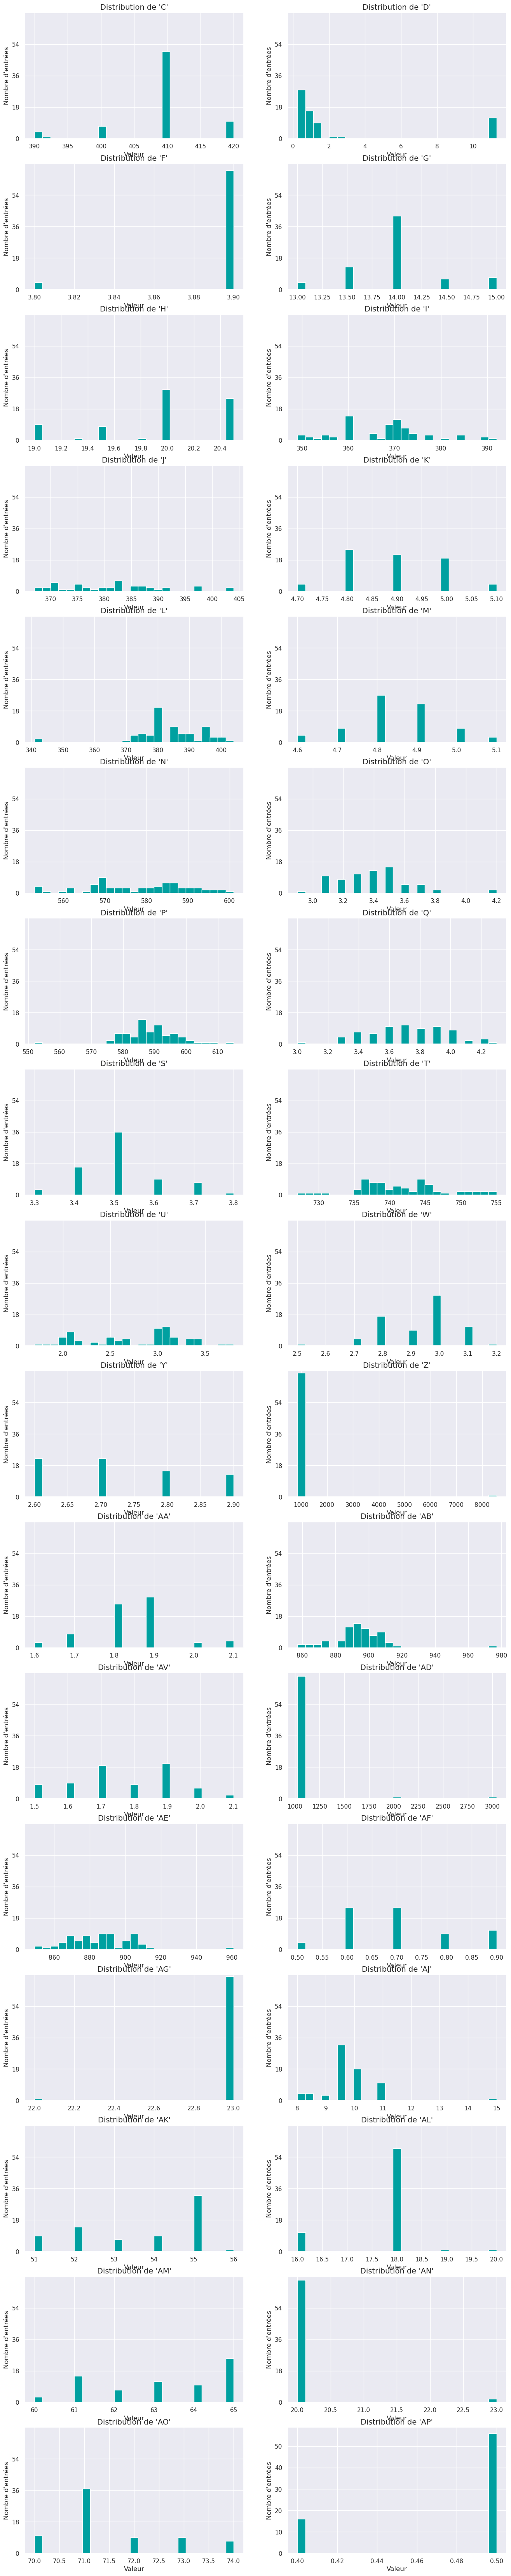

In [10]:
# Create the figure
fig = plt.figure(figsize=(16, rows * 5))

# Affichage de l'asymétrie des données
for i, feature in enumerate(df[num_col]):
    ax = fig.add_subplot(rows, 2, i+1)
    ax.hist(df[feature], bins = 25, color = '#00A0A0')
    ax.set_title("Distribution de '%s'"%(feature), fontsize = 14)
    ax.set_xlabel("Valeur")
    ax.set_ylabel("Nombre d'entrées")
    ax.set_ylim((0, df.shape[0]))
    ax.set_yticks([b for b in range(0, df.shape[0], max(1, df.shape[0] // 4))])
    # ax.set_yticklabels([b for b in range(0, df.shape[0], df.shape[0]/4)])

# Tracé aesthetics
fig.suptitle("Distributions des caractéristiques de données continues du recensemment", fontsize = 16, y = 1.03)

fig.tight_layout()
plt.show()

In [11]:
# Calcul de l'asymétrie et ordonancer
skew_feats = df[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness = skewness.to_dict()['Skew']
skewness

{'Z': 8.48130506125031,
 'AD': 6.760095569147783,
 'AN': 5.8700564462546545,
 'AJ': 2.1335971792744446,
 'D': 1.6760158416742108,
 'AB': 1.4729031589072221,
 'O': 0.9158139185533496,
 'AE': 0.8621897328185427,
 'AO': 0.8434771266157399,
 'J': 0.5875196235750714,
 'S': 0.5428392405919509,
 'AF': 0.4337477462610552,
 'G': 0.34024955508559435,
 'Y': 0.32866621312759003,
 'I': 0.2695836396718121,
 'T': 0.17522068537947713,
 'K': 0.1421176198954849,
 'AA': 0.11101554752854365,
 'M': 0.02833290846454986,
 'AV': -0.030334279265101217,
 'Q': -0.11587196542633213,
 'N': -0.20838603042094683,
 'U': -0.22662766230761888,
 'AM': -0.3518910898832249,
 'P': -0.38927093847328903,
 'AK': -0.4747677506894832,
 'W': -0.6369987231131244,
 'H': -0.7075046938758908,
 'C': -1.007320937418922,
 'AL': -1.2731724853822075,
 'L': -1.3635654592700697,
 'AP': -1.3649079679351783,
 'F': -3.963628153504723,
 'AR': -8.32729516952413,
 'AG': -8.48528137423856}

In [ ]:
df.describe()

In [95]:
df.head()

,B,C,D,E,F,G,H,I,J,K,...,AF,AG,AJ,AK,AL,AM,AN,AO,AP,AR
0,00:00:00,410.0,0.44,Y,3.9,14.5,20.5,374.0,381.0,4.8,...,0.6,23.0,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0
1,01:00:00,410.0,11.28,N,3.9,14.5,20.5,371.0,382.0,4.8,...,0.6,23.0,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0
2,02:00:00,410.0,0.65,Y,3.9,14.0,20.5,368.0,387.0,4.8,...,0.6,23.0,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0
3,03:00:00,410.0,0.69,Y,3.9,14.0,20.5,371.0,385.0,4.9,...,0.6,23.0,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0
4,04:00:00,410.0,0.65,Y,3.9,14.0,20.5,371.0,398.0,4.9,...,0.7,23.0,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0


### Transformer les colonnes "Eligibility test" et "hour"

In [12]:
df[df.columns[3]] = df[df.columns[3]].apply(lambda x: x if pd.isna(x) else 0 if x != "Y" else 1 )

In [13]:
df.isna().sum()

B      0
C      0
D      5
E     11
F      0
G      0
H      0
I      0
J     28
K      0
L      0
M      0
N      0
O      0
P      0
Q      0
S      0
T      0
U      0
W      0
Y      0
Z      0
AA     0
AB     0
AV     0
AD     0
AE     0
AF     0
AG     0
AJ     0
AK     0
AL     0
AM     0
AN     0
AO     0
AP     0
AR     0
dtype: int64

In [14]:
df.head()

,B,C,D,E,F,G,H,I,J,K,...,AF,AG,AJ,AK,AL,AM,AN,AO,AP,AR
0,00:00:00,410.0,0.44,1.0,3.9,14.5,20.5,374.0,381.0,4.8,...,0.6,23.0,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0
1,01:00:00,410.0,11.28,0.0,3.9,14.5,20.5,371.0,382.0,4.8,...,0.6,23.0,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0
2,02:00:00,410.0,0.65,1.0,3.9,14.0,20.5,368.0,387.0,4.8,...,0.6,23.0,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0
3,03:00:00,410.0,0.69,1.0,3.9,14.0,20.5,371.0,385.0,4.9,...,0.6,23.0,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0
4,04:00:00,410.0,0.65,1.0,3.9,14.0,20.5,371.0,398.0,4.9,...,0.7,23.0,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0


In [15]:
df.dropna(subset=[df.columns[0]], inplace=True)

df[df.columns[0]]=df[df.columns[0]].apply(lambda x: str(x).split(':')[0])

df['hour_sin'] = np.sin(2 * np.pi * df[df.columns[0]].astype(int) / 24)
df['hour_cos'] = np.cos(2 * np.pi * df[df.columns[0]].astype(int) / 24)

df.head()

,B,C,D,E,F,G,H,I,J,K,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
0,00,410.0,0.44,1.0,3.9,14.5,20.5,374.0,381.0,4.8,...,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0,0.000000,1.000000
1,01,410.0,11.28,0.0,3.9,14.5,20.5,371.0,382.0,4.8,...,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0,0.258819,0.965926
2,02,410.0,0.65,1.0,3.9,14.0,20.5,368.0,387.0,4.8,...,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0,0.500000,0.866025
3,03,410.0,0.69,1.0,3.9,14.0,20.5,371.0,385.0,4.9,...,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0,0.707107,0.707107
4,04,410.0,0.65,1.0,3.9,14.0,20.5,371.0,398.0,4.9,...,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0,0.866025,0.500000


### Identifier les colonnes aux valeurs manquantes

In [16]:
df_cp = df.copy(deep=True)

In [17]:
target_columns = []
for col, n in df_cp.isna().sum().to_dict().items():
    if n != 0:
        target_columns.append(col)
target_columns

['D', 'E', 'J']

In [18]:
df.columns[2], df.columns[3], df.columns[8]

('D', 'E', 'J')

### Remplacer les valeurs manquantes

In [19]:
df[df.columns[2]] = df[df.columns[2]].fillna(np.median(df[df.columns[2]]))
df[df.columns[3]] = df[df.columns[3]].fillna(df[df.columns[3]].mode()[0])
df[df.columns[8]] = df[df.columns[8]].fillna(np.mean(df[df.columns[8]]))

In [20]:
df.head()

,B,C,D,E,F,G,H,I,J,K,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
0,00,410.0,0.44,1.0,3.9,14.5,20.5,374.0,381.0,4.8,...,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0,0.000000,1.000000
1,01,410.0,11.28,0.0,3.9,14.5,20.5,371.0,382.0,4.8,...,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0,0.258819,0.965926
2,02,410.0,0.65,1.0,3.9,14.0,20.5,368.0,387.0,4.8,...,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0,0.500000,0.866025
3,03,410.0,0.69,1.0,3.9,14.0,20.5,371.0,385.0,4.9,...,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0,0.707107,0.707107
4,04,410.0,0.65,1.0,3.9,14.0,20.5,371.0,398.0,4.9,...,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0,0.866025,0.500000


### Verifier la correlation entre les differentes colonnes

<Axes: >

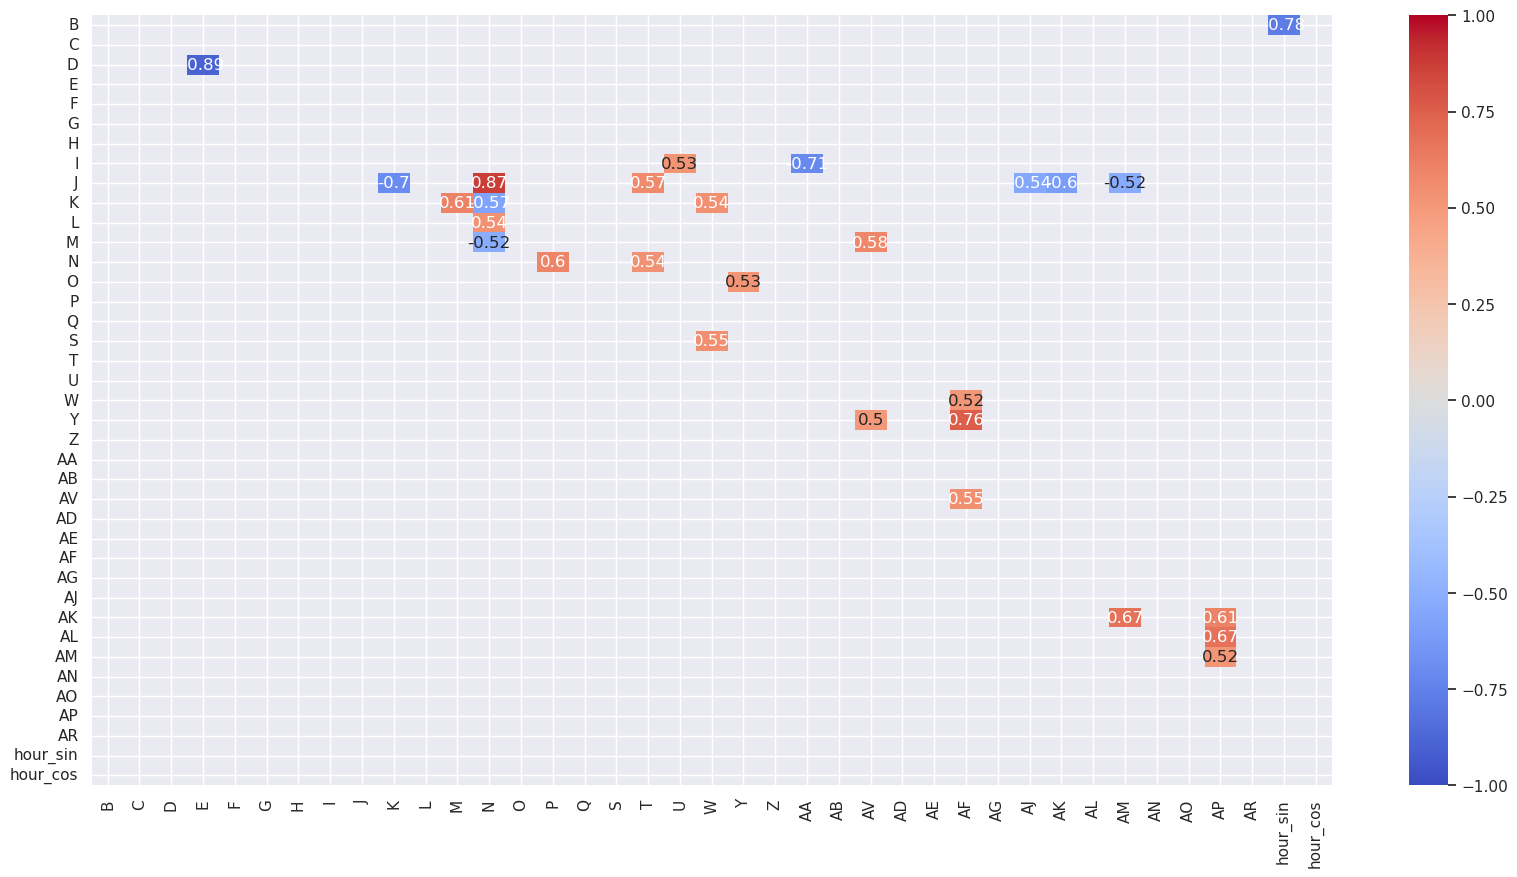

In [21]:
# Calculate correlation matrix
corr = df_cp.corr()

# Filter correlations greater than 0.5 in absolute value
filtered_corr = corr.where((corr.abs() > 0.5) & (corr.abs() < 1))

# Create a mask to hide NaNs and the lower triangle
mask = filtered_corr.isnull() | (np.tril(np.ones(filtered_corr.shape)).astype(bool))

figure = plt.figure(figsize=(20, 10))
sns.heatmap(filtered_corr, mask=mask, annot=True, cmap='coolwarm',
            vmin=-1.0, vmax=1.0,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Suppression des colonnes corrélées

In [79]:
# Suppression des colonnes corrélées suivant les valeurs de la matrice de correlation


### Séparation des données d'entrainement, de validation, de test et ceux à prédire

In [22]:
pred_df = df_cp[df_cp[df.columns[2]].isna() | df_cp[df.columns[3]].isna() | df_cp[df.columns[8]].isna()]
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 9 to 71
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   B         35 non-null     object 
 1   C         35 non-null     float64
 2   D         30 non-null     float64
 3   E         24 non-null     float64
 4   F         35 non-null     float64
 5   G         35 non-null     float64
 6   H         35 non-null     float64
 7   I         35 non-null     float64
 8   J         7 non-null      float64
 9   K         35 non-null     float64
 10  L         35 non-null     float64
 11  M         35 non-null     float64
 12  N         35 non-null     float64
 13  O         35 non-null     float64
 14  P         35 non-null     float64
 15  Q         35 non-null     float64
 16  S         35 non-null     float64
 17  T         35 non-null     float64
 18  U         35 non-null     float64
 19  W         35 non-null     float64
 20  Y         35 non-null     float64
 21  

### Gestion de l'asymétrie, par une transformation logarithmique des colonnes à utiliser avec nos modèles.

In [23]:
# Take columns with high correlation with target values
high_corr_columns = {}

for target_column in target_columns:
    high_corr_columns[target_column] = new_high_corr_columns = corr.loc[
        (corr[target_column].abs() > 0.5) & (corr[target_column].abs() < 1),
        target_column
    ].index.tolist()

high_corr_columns

{'D': ['E'], 'E': ['D'], 'J': ['K', 'N', 'T', 'AJ', 'AK', 'AM']}

### Models pour la prediction des valeurs manquantes de la colonne E

In [24]:
df_cp = df_cp[df_cp[df.columns[2]].notna() & df_cp[df.columns[3]].notna()]
y = df_cp[df.columns[3]]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(df_cp[high_corr_columns.get('E')],y,test_size=0.2, random_state=42)

In [25]:
# Log transformation des caractéristiques fortement asymétriques
for col in high_corr_columns.get("E"):
    if col in skewness.keys():
        if skewness[col] > 1:
            X_train_df[col].apply(lambda x: np.log(x + 1))
            X_test_df[col].apply(lambda x: np.log(x + 1))

In [26]:
#Normalisation des colonnes present dans num_col
X_num_cols = []
for col in X_train_df.columns:
    if col in num_col:
        X_num_cols.append(col)
X_num_cols

['D']

In [27]:
scaler = MinMaxScaler() # default=(0, 1)
X_train_df[X_num_cols] = scaler.fit_transform(X_train_df[X_num_cols])
X_train_df.head()

,D
3,0.033759
63,0.077555
17,0.993613
8,0.095803
6,0.019161


In [28]:
X_test_df[X_num_cols] = scaler.transform(X_test_df[X_num_cols])
X_test_df.head()

,D
0,0.010949
5,0.998175
54,0.026460
34,0.033759
13,0.999088


In [29]:
decision_tree_model = DecisionTreeClassifier()

In [30]:
decision_tree_model.fit(X_train_df, y_train_df)
y_pred_dt_e = decision_tree_model.predict(X_test_df)
r2_score_pred_dt_e = r2_score(y_test_df, y_pred_dt_e)
mse_pred_dt_e = mean_squared_error(y_test_df, y_pred_dt_e)

In [31]:
print(f"Error: mse = {mse_pred_dt_e:.4f}, r2_score = {r2_score_pred_dt_e:.4f}")

Error: mse = 0.0000, r2_score = 1.0000


In [34]:
export_graphviz(
    decision_tree_model,
    out_file="eligibility-test-decision-tree.dot",
    feature_names=X_train_df.columns,
    class_names=[str(cls) for cls in y_train_df.unique()],
    rounded=True,
    filled=True
)

### Ainsi avec le modèle de Decision Tree, on obtient un r2_score de 1.0 et un mse de 0.0, ce qui signifie que le modèle a parfaitement prédit les valeurs de la colonne E. Ce qui est un résultat très satisfaisant et indique qu'un modèle de Machine learning n'est pas nécessaire pour prédire les valeurs de la colonne E.

### Modèles pour la prédiction des elements manquants de la colonne D

In [27]:
d_regr_lin = LinearRegression()
d_regr_lin.fit(X_train_D_df, y_train_df)
y_pred_regr_lin = d_regr_lin.predict(X_test_D_df)
r2_score_d_pred_reg_lin = r2_score(y_test_df, y_pred_regr_lin)
mse_d_pred_reg_lin = mean_squared_error(y_test_df, y_pred_regr_lin)

print(f"Error: mse = {mse_d_pred_reg_lin:.4f}, r2_score = {r2_score_d_pred_reg_lin:.4f}")

Error: mse = 113.6363, r2_score = -0.0070


In [31]:
d_regr_svr = svm.SVR()
d_regr_svr.fit(X_train_D_df, y_train_df)
y_pred_regr_svr = d_regr_svr.predict(X_test_D_df)
r2_score_d_regr_svr = r2_score(y_test_df, y_pred_regr_svr)
mse_d_regr_svr = mean_squared_error(y_test_df, y_pred_regr_svr)

print(f"Error: mse = {mse_d_regr_svr:.4f}, r2_score = {r2_score_d_regr_svr:.4f}")

Error: mse = 113.6806, r2_score = -0.0073
